In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[  4.275     31.419375  14.       236.         3.975     23.549375
  16.       224.         5.125     50.849375  27.       369.
   8.475    117.659375  25.       525.         7.5       74.39
  17.       369.         2.         4.5       15.        94.
   1.475      2.924375   9.        73.         2.         6.4275
  10.       112.         0.      ]


<Figure size 432x288 with 0 Axes>

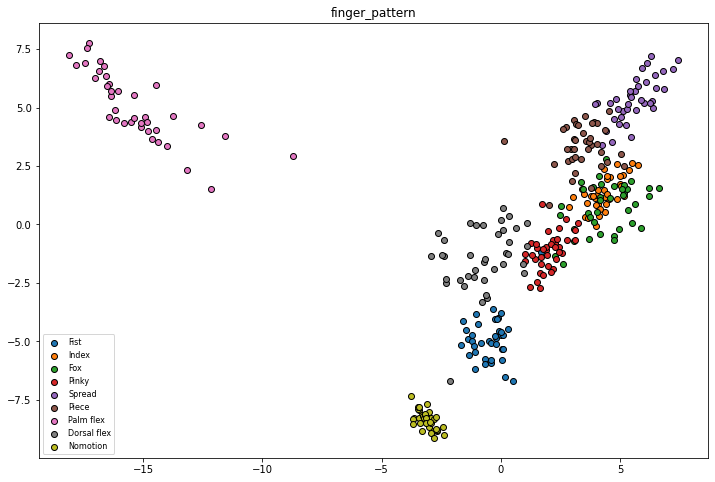

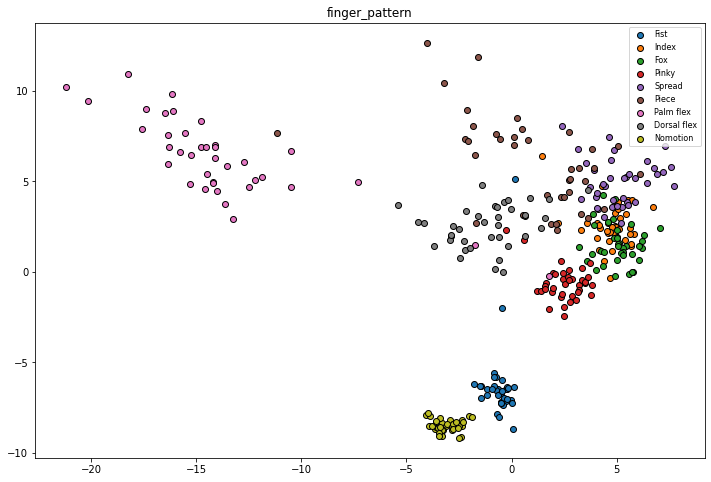

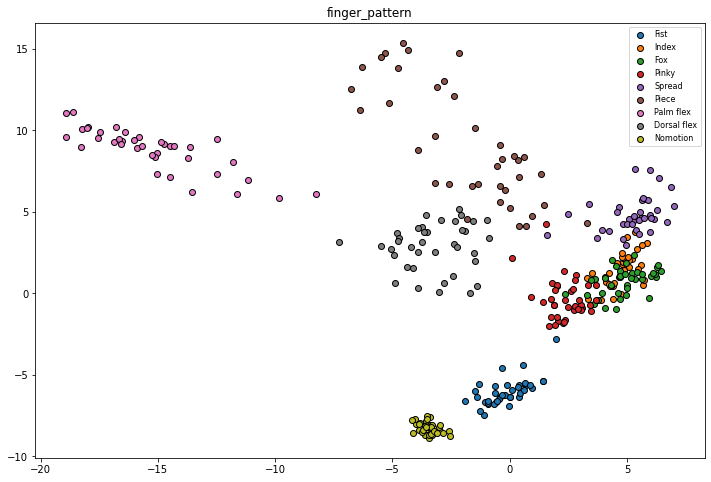

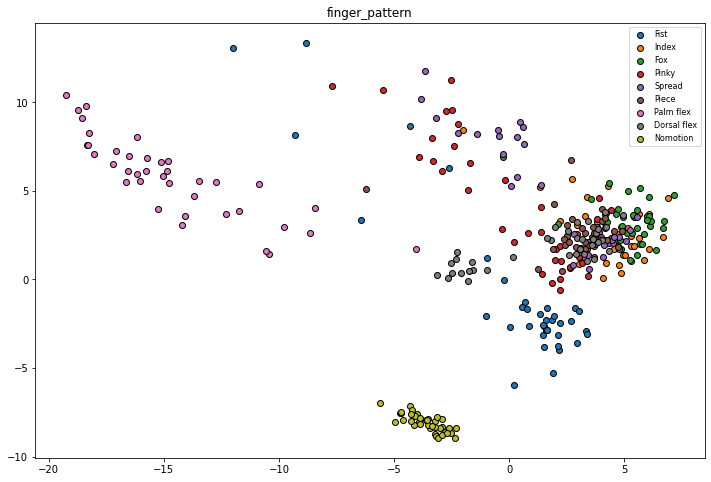

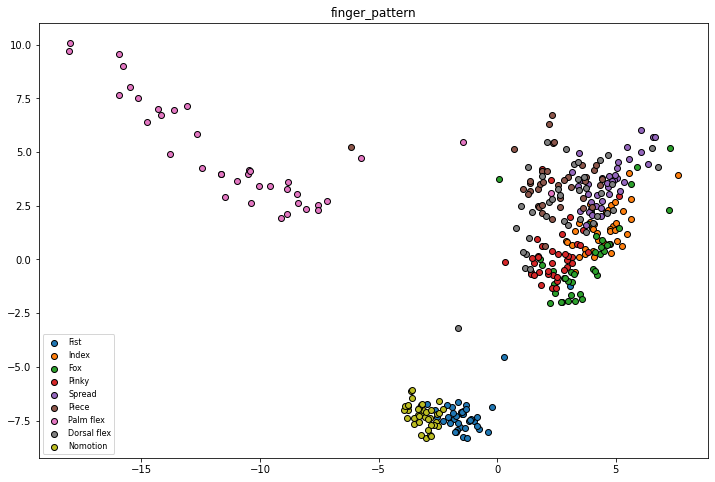

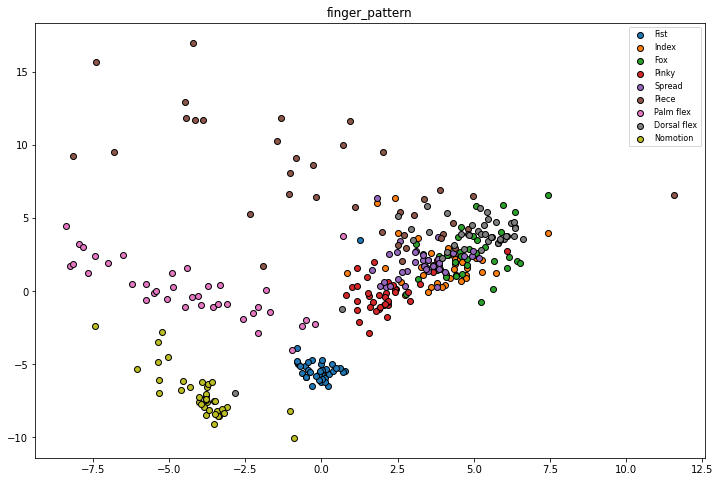

[0.19544479576725526, 0.24555984269482137, 0.1313154931050479, 0.09864687449276137, 0.06028382848366991, 0.15809615277682187, 0.13188081362350565, 0.12145639231272702, 0.24104041502093052, 0.0880482144456452, 0.09278203642723387, 0.10079219247552727, 0.16553702516285376, 0.2274863047089762, 0.06947268279790218, 0.23578749385759679, 0.2142767076233979, 0.13909521911754053, 0.15294052652695653, 0.11927225268819636, 0.17173167517167093, 0.15360757320325216, 1.6710331239954937e-05, 0.14502115832617785, 0.14020504481180096, 0.1360280103856625, 0.1281496833507899, 0.027241302108524615, 0.20643335545833186, 0.2160438272033843, 0.021662930374503928, 0.005910994349772838, 0.1812447834042216, 0.1038893765725281, 0.15448563760146028, 0.053412033951571805, 0.16815232831726248, 0.1944561578884904]
[0.25703021198532444, 0.2498079173331913, 0.3519649538152959, 0.1013726269433031, 0.11400800993109804, 0.1368551534712095, 0.03487565997100327, 0.13285304367796485, 0.32438120873331155, 0.1316155490177848

In [95]:
#/content/drive/Shareddrives/近藤研究室/学生/B4/安田/本実験
#@title 被験者・条件設定部(変更時に自動実行){ run: "auto" }
subject3="hdk"  #@param["sgwr","kwmr","frn","tni","tnk","hdk","nkn","ibk"] 
hand3="r"  #@param["r","l"]
filepath3="/content/drive/Shareddrives/近藤研究室/学生/B4/安田/本実験/"+subject3
#各トライアル後の計測金電位のクラスター解析
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.spatial import distance
import random

#条件の全ファイル読み込み
EMG2d_points=[]
EMG2d_features=[]
EMG2d_centers=[]
LDA=LinearDiscriminantAnalysis(n_components=2)

sample_num=[]
#データサンプル数を揃える

for i in range(6):
  tmp_df = pd.read_csv(filepath3+"/"+subject3+"_"+hand3+"_base"+str(i)+".csv", header=0, index_col=0)
  features = tmp_df.values[:,-1]
  tmp_df=tmp_df.values[:,0:-1]
  tmp_samples=[]
  for k in range(9):
    tmp = []
    tmp.append(len([tmp_df[j] for j in range(len(features)) if features[j] == (k)]))
    tmp_samples.append(tmp)
  sample_num.append(tmp_samples)
min_sample=np.nanmin(np.array(sample_num).flatten())
df=[]
for i in range(6):
  tmp_df = pd.read_csv(filepath3+"/"+subject3+"_"+hand3+"_base"+str(i)+".csv", header=0, index_col=0)
  features = tmp_df.values[:,-1]
  tmp_df=tmp_df.values
  tmp_samples=[]
  for k in range(9):
    tmp=[tmp_df[j] for j in range(len(features)) if features[j] == (k)]
    tmp = random.sample(tmp,min_sample)
    tmp_samples.extend(tmp)
  df.append(tmp_samples)

print(df[0][0])

#重心計算とLDA学習

for i in range(6):
  tmp_df = pd.DataFrame(df[i])
  features = tmp_df.values[:,-1]
  tmp_df=tmp_df.values[:,0:-1]
  if(i==0):
    LDA.fit(tmp_df, features)
  EMG2d_points.append(LDA.transform(tmp_df))
  tmp_centers=[] #各クラスの重心
  tmp2d_points=EMG2d_points[i]
  for k in range(9):
      tmp = []
      tmp.append(np.mean([tmp2d_points[j][0] for j in range(len(tmp2d_points)) if features[j] == (k)]))
      tmp.append(np.mean([tmp2d_points[j][1] for j in range(len(tmp2d_points)) if features[j] == (k)]))
      tmp_centers.append(tmp)
  EMG2d_centers.append(tmp_centers)
  EMG2d_features.append(features)

#散布図作成
plt.figure()
for i in range(6):
  fig = plt.figure(figsize=(12, 8))
  ax1 = plt.subplot(111)
  label_ = ["Fist", "Index","Fox","Pinky","Spread","Piece","Palm flex","Dorsal flex","Nomotion"]
  tmp2d_points=EMG2d_points[i]
  features=EMG2d_features[i]
  for k in range(9):    #手描画
      tmp = []
      tmp.append([tmp2d_points[j][0] for j in range(len(tmp2d_points)) if features[j] == (k)])
      tmp.append([tmp2d_points[j][1] for j in range(len(tmp2d_points)) if features[j] == (k)])
      tmp = np.array(tmp)
      scat_finger=ax1.scatter(tmp[0], tmp[1], label=label_[k], cmap='viridis', edgecolor='blacK')
  ax1.set_title("finger_pattern")
  ax1.legend(labels=label_, fontsize=8)
  plt.show()

#クラス内の所属確率の分散、クラス間距離の計算
#https://emoson.hateblo.jp/entry/2015/02/06/182256
#借りました
def mnd(_x, _mu, _sig):
    x = np.matrix(_x)
    mu = np.matrix(_mu)
    sig = np.matrix(_sig)
    a = np.sqrt(np.linalg.det(sig)*(2*np.pi)**sig.ndim)
    b = np.linalg.det(-0.5*(x-mu)*sig.I*(x-mu).T)
    return np.exp(b)/a

intra_var=[]
for i in range(6):
  class_=[]
  tmp2d_points=EMG2d_points[i]
  features=EMG2d_features[i]
  tmp_vars=[]
  for k in range(9):    #手描画
      tmp = []
      tmp.append([tmp2d_points[j][0] for j in range(len(tmp2d_points)) if features[j] == (k)])
      tmp.append([tmp2d_points[j][1] for j in range(len(tmp2d_points)) if features[j] == (k)])
      tmp = np.array(tmp)
      tmp_cov=np.cov(tmp[0],tmp[1])
      tmp_mnds=[]
      for m in range(len(tmp[0])):
        tmp_mnds.append(mnd(tmp[:,m],EMG2d_centers[i][k],tmp_cov))
      print(tmp_mnds)
        



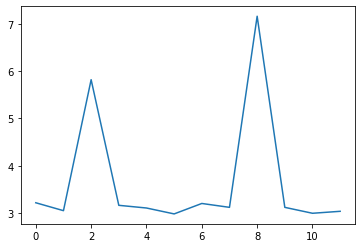

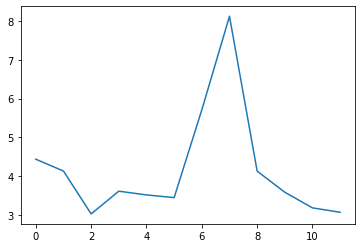

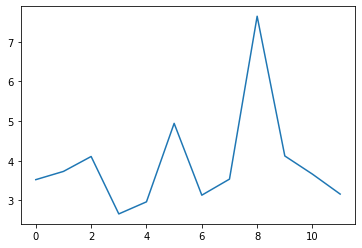

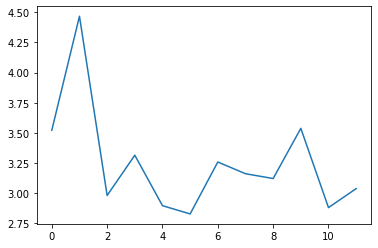

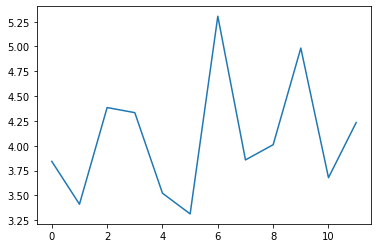

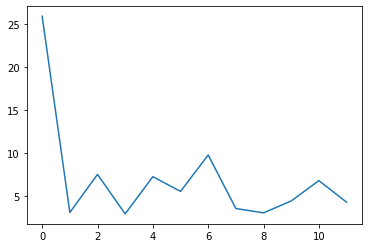

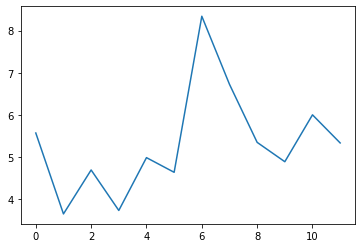

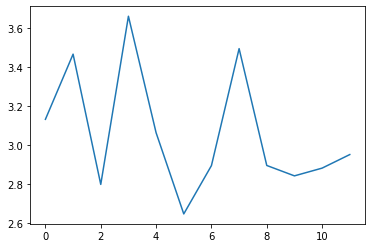

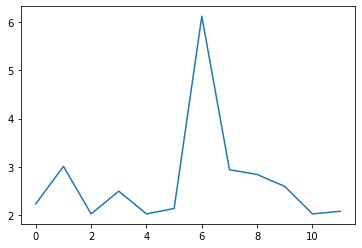

In [15]:
#@title 被験者・条件設定部(変更時に自動実行){ run: "auto" }
#被験者・条件毎の重心計算と散布図まで実装
subject1="tnk"  #@param["sgwr","kwmr","frn","tni","tnk","hdk","nkn","ibk"] 
hand1="l"  #@param["r","l"]
filepath1="/content/drive/Shareddrives/近藤研究室/学生/B4/安田/本実験/"+subject1
#評価タスクの秒数計算
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

#ファイル読み込み
task_times=[[] for i in range(9)]
filenum=0
for j in range(6):
  tmp_result = np.loadtxt(filepath1+"/times/"+subject1+"_"+hand1+"_eva"+str(j)+".txt",delimiter=",")
  for i in range(18):
    task_times[int(tmp_result[i+18])].append(tmp_result[i])

#平均を出す(暫定)

#表示
plt.figure()
for j in range(9):
  plt.plot(task_times[j])
  plt.show()

タスク秒数：各タスクで２つずつあるデータはどう扱うか　２こイチで表記するか、平均にするか、時系列に沿って並べるか

タスク中の筋電位データの座標はどう扱うか
９種類のタスク毎にマハラノビス距離or確率変数を計算し、base0のデータに対してどの様な位置を見つけて居るかを確かめる。

In [28]:
#/content/drive/Shareddrives/近藤研究室/学生/B4/安田/本実験
#@title 被験者・条件設定部(変更時に自動実行){ run: "auto" }
subject2="ibk"  #@param["sgwr","kwmr","frn","tni","tnk","hdk","nkn","ibk"] 
hand2="l"  #@param["r","l"]
filepath2="/content/drive/Shareddrives/近藤研究室/学生/B4/安田/本実験/"+subject2
#base0に対しての評価タスクデータ計算
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.spatial import distance
class_f = 9  # 指
lda_finger=LinearDiscriminantAnalysis(n_components=2)
base_df = pd.read_csv(filepath2+"/"+subject2+"_base0_r.csv", header=0, index_col=0)
features_finger = base_df.values[:,-1]
base_df=base_df.values[:,0:-1]
base2d_finger = lda_finger.fit(base_df, features_finger).transform(base_df)
basedata_finger=[] #各クラスの重心
for k in range(class_f):
    tmp = []
    tmp.append([base2d_finger[j][0] for j in range(len(base2d_finger)) if features_finger[j] == (k)])
    tmp.append([base2d_finger[j][1] for j in range(len(base2d_finger)) if features_finger[j] == (k)])
    basedata_finger.append(tmp)
basedata_f_centers=[]

for i in range(class_f):
    tmp=[]
    tmp.append(np.mean(basedata_finger[i][0]))
    tmp.append(np.mean(basedata_finger[i][1]))
    basedata_f_centers.append(tmp)

#ここからが計測データの処理
basedata_f_cov=[]

for i in range(9):
    tmp=np.cov(basedata_finger[i][0],basedata_finger[i][1])
    basedata_f_cov.append(np.linalg.pinv(tmp))

input_f_maharanobis=[]
input_df = pd.read_csv(filepath2+"/"+subject2+"/"+subject2+"_"+hand2+"_base"+i+"_r.csv", header=0, index_col=0)
input_finger2d=np.array(input_df.values[:,0:3])
input_wrist2d=np.array(input_df.values[:,3:6])

input_f_labels=np.array(input_df.values[:,0])
for j in range(class_f):
    center=basedata_f_centers[j]
    tmp=[]
    for i in range(len(input_finger2d)):
        tmp.append(distance.mahalanobis(list(input_finger2d[i][1:3]),center,basedata_f_cov[int(input_finger2d[i][0])-1]))
    input_f_maharanobis.append(tmp)


fig, axlist = plt.subplots(2,1,figsize=(18.0, 12.0))
id=421
title=["fist","index","fox","pinky","spread","piece","wave in","wave out","nomotion"]
i=0
for ax in axlist:
    ax.set_title(title[i])
    ax.plot(np.arange(len(input_f_maharanobis[0])),input_f_maharanobis[i]) #int(input_finger2d[i][0])-1
    ax.grid()
    ax.set_xlabel('sample')
    ax.set_ylabel('maharanobis distance')
    i+=1
plt.subplots_adjust(wspace=0.4, hspace=1)

target_class=0
pre=9
target_flag=False
part_ave_mahalanobis=[]
part_var_mahalanobis=[]
tmp=[]
tmp1=[]
j=0
for ax in axlist:

    for i in range(len(input_finger2d)):    #len(input_finger2d)-1
        if target_flag:
            tmp.append(input_f_maharanobis[j][i])
            tmp1.append(input_f_maharanobis[j][i])
        if input_finger2d[i][0] != pre:
            if target_flag:
                ax.axvspan(start, i, facecolor='orange', alpha=0.5)
                target_flag=False
                part_ave_mahalanobis.append(round(np.mean(tmp[2:-3]),4))
                part_var_mahalanobis.append(round(np.var(tmp[2:-2]),4))
            if input_finger2d[i][0]==target_class:
                start=i
                target_flag=True
                tmp = []
            pre=input_finger2d[i][0]
    print(part_ave_mahalanobis)
    print(part_var_mahalanobis)
    j+=1
    plt.xlabel('time(1 sample/0.16s)')
    plt.ylabel('maharanobis distance')
    plt.show()
    if j==1 :
        break


fig1, ax1 = plt.subplots()
ax1.set_title('Mahalanobis distance')
ax1.set_xticklabels(['average'])
ax1.boxplot(tmp1)
plt.show()

FileNotFoundError: ignored

データ数が異なるbaseデータサンプルは最小データサンプルのサンプル数に合わせて他のデータサンプルの数も減らし、改めて描画する
座標は2次元,分散の度合いは多変量正規分布の値の分散

変換行列はベースデータのものを使用すること

考察には確率密度の分散と、各クラス間確率密度の合計、トライアル後のデータが